### Import library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### first exploration
check:
- how many columns
- datatypes
- general statistics over data

In [3]:
df = pd.read_csv("../data/netflix_titles.csv", sep=",")

In [7]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [9]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [13]:
print("N columns: ", len(df.columns))
print("N rows: ", len(df))

N columns:  12
N rows:  8807


### Explorate each column

In [33]:
low_cardinal_col = []
to_drop = []
high_cardinal = []
numerical = []
dates = []
to_vectorize = []

In [34]:
col = "show_id"

df[col].nunique()

to_drop.append(col)

show id is the id column with a value per each row, this column is going to be drop

Nan:  0.0


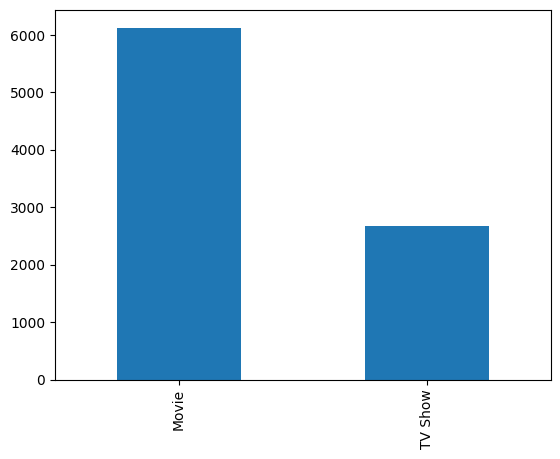

In [35]:
col = "type"

df[col].value_counts().plot.bar()

print("Nan: ", df[col].isna().mean())

low_cardinal_col.append(col)

Variable with low cardinality and no empty

In [36]:
col = "title"

print(df[col].nunique())

to_drop.append(col)

8807


This variable is the title of the movie, seem useless at the moment

In [54]:
col = "director"

print("Nan: ", df[col].isna().mean())

print(df[col].str.split(",").value_counts())

high_cardinal.append(col)

Nan:  0.29908027705234475
[Rajiv Chilaka]                      19
[Raúl Campos,  Jan Suter]            18
[Marcus Raboy]                       16
[Suhas Kadav]                        16
[Jay Karas]                          14
                                     ..
[Raymie Muzquiz,  Stu Livingston]     1
[Joe Menendez]                        1
[Eric Bross]                          1
[Will Eisenberg]                      1
[Mozez Singh]                         1
Name: director, Length: 4528, dtype: int64


high cardinal variable, which could have some meaning

In [58]:
col = "cast"

actors = []
for row in df[col].str.split(",").dropna():
    for actor in row:
        actors.append(actor)

# the actors who appear more
pd.Series(actors).value_counts()

print("Nan ", df[col].isna().mean())

to_vectorize.append(col)


Nan  0.09367548540933349


maybe it's an idea to remove actor who appear only one time they are useless

In [63]:
col = "country"

print("Cardinality ", df[col].nunique())
print("Nan ", df[col].isna().mean())

country = []
for row in df[col].str.replace(" ", "").str.split(",").dropna():
    for c in row:
        country.append(c)

pd.Series(country).value_counts()

to_vectorize.append(col)

Cardinality  748
Nan  0.09435676166685592


puedes ser usado el pais para decidir que pelicula se prefiere ver, aunque sea una columna complicada de usar

<Axes: >

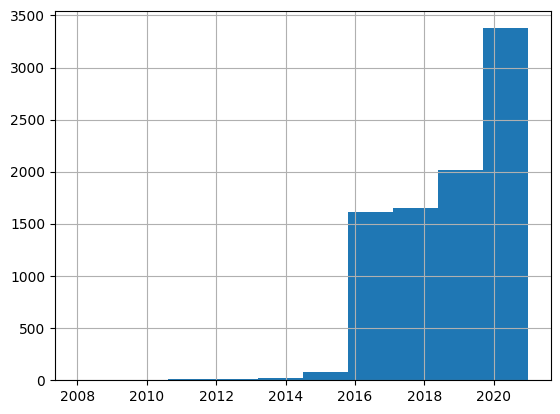

In [70]:
col = "date_added"

pd.to_datetime(df[col]).dt.year.hist()

esta columna puede ser usada para sugerir las ultimas pelis anadidas en netflix

<Axes: >

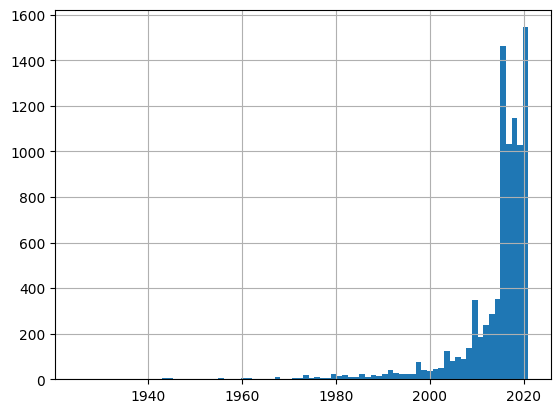

In [72]:
col = "release_year"

df[col].hist(bins=80)

maybe suggest depending on the range in which the user is whatchin the series

N unique  17
Nan  0.0004541841716816169


<Axes: >

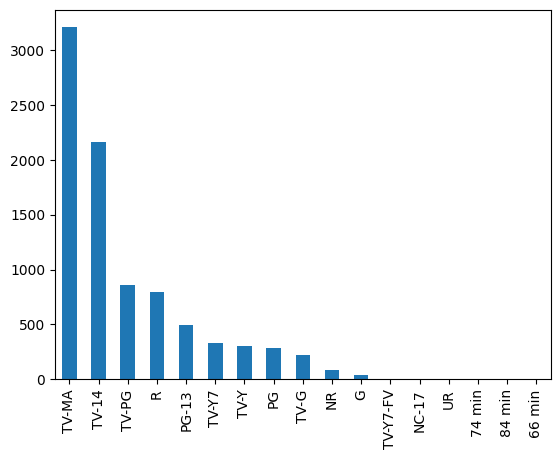

In [76]:
col = "rating"

print("N unique ", df[col].nunique())
print("Nan ", df[col].isna().mean())

df[col].value_counts().plot.bar()

de analizar que efectivamente significa esta columna

In [78]:
col = "duration"

print("N unique ", df[col].nunique())
print("Nan ", df[col].isna().mean())

df[col].value_counts()

N unique  220
Nan  0.00034063812876121267


1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: duration, Length: 220, dtype: int64

maybe discretize the minute variable to be able to suggest a range of time

N unique  514
Nan  0.0
N unique after treat 42


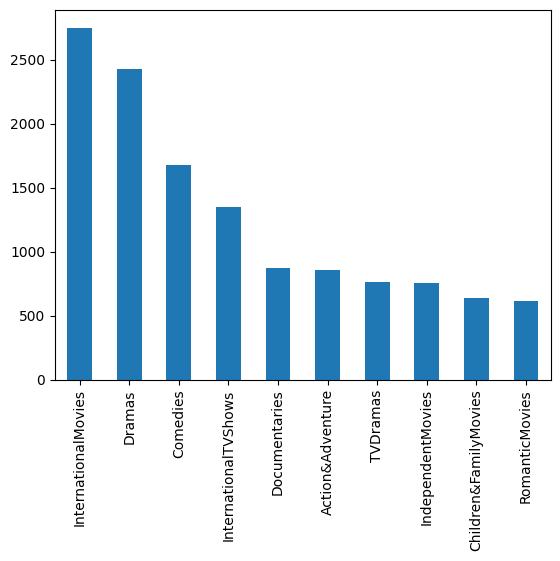

In [84]:
col = "listed_in"

print("N unique ", df[col].nunique())
print("Nan ", df[col].isna().mean())

tags = []
for row in df[col].str.replace(" ", "").str.split(",").dropna():
    for c in row:
        tags.append(c)

pd.Series(tags).value_counts()[:10].plot.bar()
print("N unique after treat", len(pd.Series(tags).value_counts()))

maybe suggest some types already seen before

Nan  0.0
Axes(0.125,0.11;0.775x0.77)


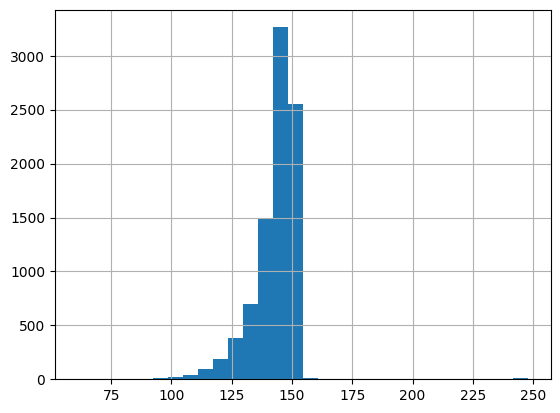

In [89]:
col = "description"

print("Nan ", df[col].isna().mean())

print(df[col].apply(len).hist(bins=30))
